In [85]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'Time')

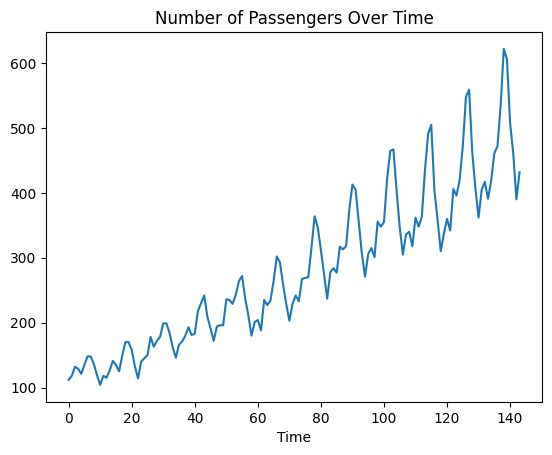

In [86]:
passengers = pd.read_csv("data/passengers.csv")

timeseries = passengers[['Passengers']].values.astype('float32')
plt.plot(timeseries)
plt.title("Number of Passengers Over Time")
plt.xlabel("Time")

In [87]:
train_size = int(len(timeseries) * 0.67)
train = timeseries[:train_size]
test_size = len(timeseries) - train_size
test= timeseries[train_size:]

In [88]:

import torch

In [ ]:
def create_dataset(dataset, look_back=1):
    X, y = [], []

    for i in range(len(dataset) - look_back):
        features = dataset[i:(i + look_back)]
        target = dataset[i+1: i+ look_back +1]
        print(f"features: {features.flatten()}, target: {target}")
        X.append(features)
        y.append(target)

    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [ ]:
lookback = 1
X_train, y_train = create_dataset(train, lookback)
X_test, y_test = create_dataset(test, lookback)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


features: [112.], target: [[118.]]
features: [118.], target: [[132.]]
features: [132.], target: [[129.]]
features: [129.], target: [[121.]]
features: [121.], target: [[135.]]
features: [135.], target: [[148.]]
features: [148.], target: [[148.]]
features: [148.], target: [[136.]]
features: [136.], target: [[119.]]
features: [119.], target: [[104.]]
features: [104.], target: [[118.]]
features: [118.], target: [[115.]]
features: [115.], target: [[126.]]
features: [126.], target: [[141.]]
features: [141.], target: [[135.]]
features: [135.], target: [[125.]]
features: [125.], target: [[149.]]
features: [149.], target: [[170.]]
features: [170.], target: [[170.]]
features: [170.], target: [[158.]]
features: [158.], target: [[133.]]
features: [133.], target: [[114.]]
features: [114.], target: [[140.]]
features: [140.], target: [[145.]]
features: [145.], target: [[150.]]
features: [150.], target: [[178.]]
features: [178.], target: [[163.]]
features: [163.], target: [[172.]]
features: [172.], ta

In [101]:
import torch.nn as nn
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x
class AirModelGru(nn.Module):
    def __init__(self):
        super().__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.gru(x)
        x = self.linear(x)
        return x

In [103]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data


model = AirModel()
modelgru = AirModelGru()
optimizer = optim.Adam(model.parameters())
optimizergru = optim.Adam(modelgru.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)
 
n_epochs = 4000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

# GRU Training Loop
for epoch in range(n_epochs):
    modelgru.train()
    for X_batch, y_batch in loader:
        y_pred = modelgru(X_batch)
        loss= loss_fn(y_pred, y_batch)
        optimizergru.zero_grad()
        loss.backward()
        optimizergru.step()

    # Validation
    if epoch % 100 != 0:
        continue
    
    modelgru.eval()
    with torch.no_grad():
        y_pred = modelgru(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = modelgru(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("GRU Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

/var/folders/v_/c443zsfs6r1cp977xnzq125m0000gn/T/ipykernel_12440/3567541742.py:28: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  train_rmse = np.sqrt(loss_fn(y_pred, y_train))
/var/folders/v_/c443zsfs6r1cp977xnzq125m0000gn/T/ipykernel_12440/3567541742.py:30: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  test_rmse = np.sqrt(loss_fn(y_pred, y_test))


Epoch 0: train RMSE 226.0574, test RMSE 422.4578
Epoch 100: train RMSE 188.4563, test RMSE 383.1503
Epoch 200: train RMSE 157.0657, test RMSE 349.4433
Epoch 300: train RMSE 129.4429, test RMSE 318.4172
Epoch 400: train RMSE 105.6305, test RMSE 289.3436
Epoch 500: train RMSE 87.2892, test RMSE 263.6502
Epoch 600: train RMSE 70.9456, test RMSE 239.1264
Epoch 700: train RMSE 57.6350, test RMSE 216.1546
Epoch 800: train RMSE 47.4346, test RMSE 195.3908
Epoch 900: train RMSE 40.0732, test RMSE 176.9290
Epoch 1000: train RMSE 34.1462, test RMSE 160.3706
Epoch 1100: train RMSE 33.3399, test RMSE 147.5669
Epoch 1200: train RMSE 27.8745, test RMSE 135.3849
Epoch 1300: train RMSE 26.5584, test RMSE 126.8807
Epoch 1400: train RMSE 25.5223, test RMSE 119.4592
Epoch 1500: train RMSE 25.2881, test RMSE 113.1659
Epoch 1600: train RMSE 24.1299, test RMSE 109.2072
Epoch 1700: train RMSE 24.1975, test RMSE 106.2621
Epoch 1800: train RMSE 23.7876, test RMSE 103.2829
Epoch 1900: train RMSE 23.7730, test R

/var/folders/v_/c443zsfs6r1cp977xnzq125m0000gn/T/ipykernel_12440/3567541742.py:50: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  train_rmse = np.sqrt(loss_fn(y_pred, y_train))
/var/folders/v_/c443zsfs6r1cp977xnzq125m0000gn/T/ipykernel_12440/3567541742.py:52: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  test_rmse = np.sqrt(loss_fn(y_pred, y_test))


GRU Epoch 0: train RMSE 226.0917, test RMSE 422.4961
GRU Epoch 100: train RMSE 170.2678, test RMSE 363.7579
GRU Epoch 200: train RMSE 127.8728, test RMSE 316.5889
GRU Epoch 300: train RMSE 96.5347, test RMSE 276.9995
GRU Epoch 400: train RMSE 73.7062, test RMSE 243.3702
GRU Epoch 500: train RMSE 55.8765, test RMSE 212.8775
GRU Epoch 600: train RMSE 43.7783, test RMSE 186.7346
GRU Epoch 700: train RMSE 36.2287, test RMSE 164.2693
GRU Epoch 800: train RMSE 30.1887, test RMSE 146.2917
GRU Epoch 900: train RMSE 27.6791, test RMSE 132.6543
GRU Epoch 1000: train RMSE 25.5400, test RMSE 121.7332
GRU Epoch 1100: train RMSE 24.9288, test RMSE 113.7902
GRU Epoch 1200: train RMSE 25.8033, test RMSE 109.1867
GRU Epoch 1300: train RMSE 23.6958, test RMSE 104.0342
GRU Epoch 1400: train RMSE 24.3989, test RMSE 99.5783
GRU Epoch 1500: train RMSE 24.0309, test RMSE 98.1954
GRU Epoch 1600: train RMSE 23.2366, test RMSE 95.7930
GRU Epoch 1700: train RMSE 23.2561, test RMSE 93.7631
GRU Epoch 1800: train R

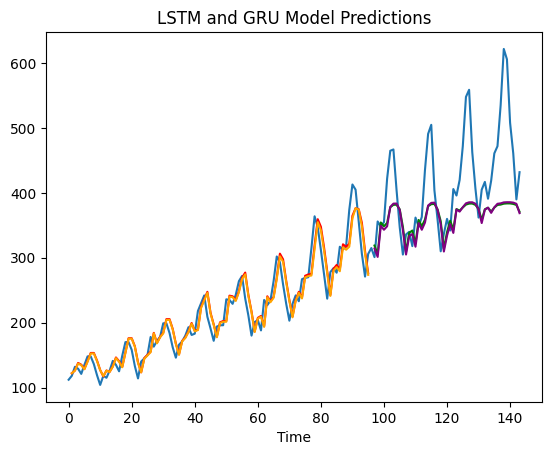

In [104]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]

    #shift train predictions for plotting GRU
    train_plot_gru = np.ones_like(timeseries) * np.nan
    y_pred_gru = modelgru(X_train)
    y_pred_gru = y_pred_gru[:, -1, :]
    train_plot_gru[lookback:train_size] = modelgru(X_train)[:, -1, :]
    # shift test predictions for plotting GRU
    test_plot_gru = np.ones_like(timeseries) * np.nan
    test_plot_gru[train_size+lookback:len(timeseries)] = modelgru(X_test)[:, -1, :]


# plot
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.plot(train_plot_gru, c='orange')
plt.plot(test_plot_gru, c='purple')
plt.title("LSTM and GRU Model Predictions")
plt.xlabel("Time")

plt.show()